#Q1: All Transformations

Saving runway.png to runway.png
Loading: runway.png
Image loaded successfully! (769, 765)


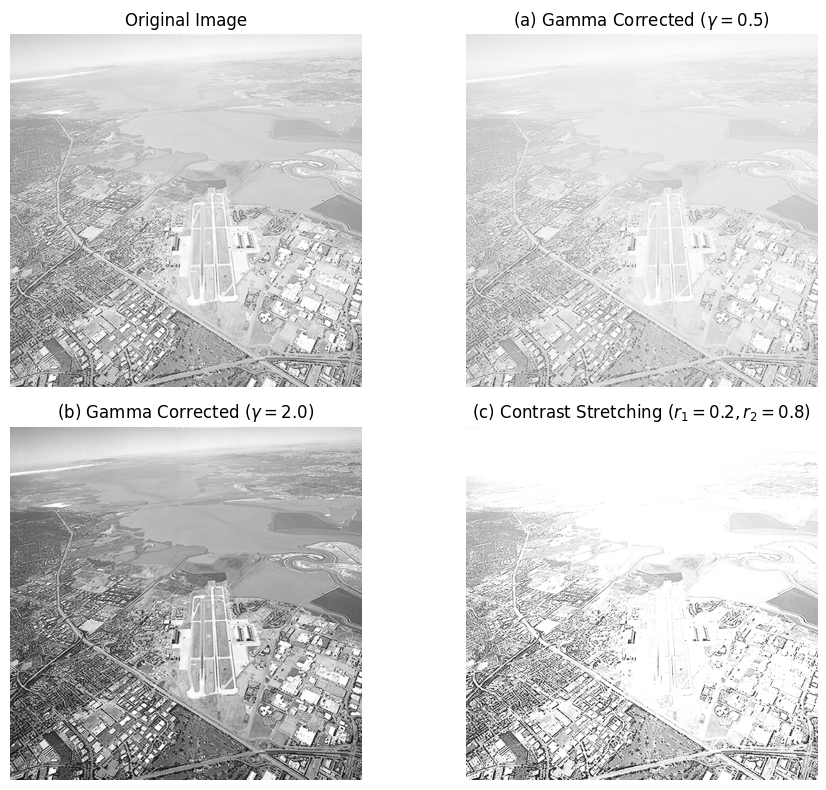

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

file_path = list(uploaded.keys())[0]
print("Loading:", file_path)

# Load image
img = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

if img is None:
    print("ERROR: Image not found.")
else:
    print("Image loaded successfully!", img.shape)

    #  GAMMA CORRECTION = 0.5 
    gamma1 = 0.5
    lut1 = np.array([((i / 255.0) ** gamma1) * 255 for i in range(256)]).astype("uint8")
    img_gamma_05 = cv.LUT(img, lut1)

    # GAMMA CORRECTION = 2.0 
    gamma2 = 2.0
    lut2 = np.array([((i / 255.0) ** gamma2) * 255 for i in range(256)]).astype("uint8")
    img_gamma_20 = cv.LUT(img, lut2)

    # CONTRAST STRETCHING 
    r1, r2 = 0.2, 0.8
    lut_stretch = []
    for i in range(256):
        r = i / 255.0
        if r < r1:
            s = 0
        elif r1 <= r <= r2:
            s = (r - r1) / (r2 - r1)
        else:
            s = 1
        lut_stretch.append(s * 255)

    lut_stretch = np.array(lut_stretch, dtype="uint8")
    img_stretched = cv.LUT(img, lut_stretch)

    #  DISPLAY 
    plt.figure(figsize=(10, 8))

    #  Origina
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    #  Gamma 0.5
    plt.subplot(2, 2, 2)
    plt.imshow(img_gamma_05, cmap='gray')
    plt.title(r'(a) Gamma Corrected ($\gamma=0.5$)')
    plt.axis('off')

    #  Gamma 2.0
    plt.subplot(2, 2, 3)
    plt.imshow(img_gamma_20, cmap='gray')
    plt.title(r'(b) Gamma Corrected ($\gamma=2.0$)')
    plt.axis('off')

    #  Contrast Stretching
    plt.subplot(2, 2, 4)
    plt.imshow(img_stretched, cmap='gray')
    plt.title(f'(c) Contrast Stretching ($r_1={r1}, r_2={r2}$)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

